In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "TSLA"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2104 entries, 2015-01-02 to 2023-05-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2104 non-null   float64
 1   High       2104 non-null   float64
 2   Low        2104 non-null   float64
 3   Close      2104 non-null   float64
 4   Adj Close  2104 non-null   float64
 5   Volume     2104 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 115.1 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-05,163.970001,170.789993,163.509995,170.059998,170.059998,107440900
2023-05-08,173.720001,173.800003,169.190002,171.789993,171.789993,112249400
2023-05-09,168.949997,169.820007,166.559998,169.149994,169.149994,88965000
2023-05-10,172.550003,174.429993,166.679993,168.539993,168.539993,119840700
2023-05-11,168.699997,173.570007,166.789993,172.080002,172.080002,102533800


In [7]:
data.shape

(2104, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2.104000e+03
mean,92.370633,94.458939,90.079809,92.318935,92.318935,1.134337e+08
std,107.889104,110.378311,105.080265,107.752153,107.752153,7.956725e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,16.428833,16.616667,16.164501,16.411000,16.411000,6.451538e+07
50%,22.397667,22.851666,22.003334,22.360000,22.360000,8.977125e+07
75%,190.054996,194.339996,184.029163,189.700005,189.700005,1.327331e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

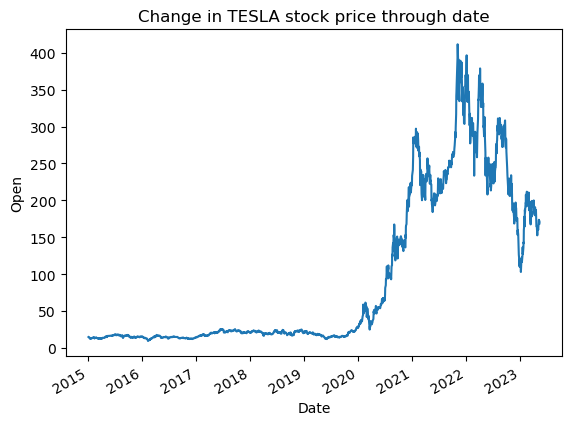

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in TESLA stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1578, 3), (526, 3))

In [15]:
y_train.shape,y_test.shape

((1578,), (526,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[ 15.392967   286.3798645  193.91746719  22.6263266   15.12236006
  15.59312006  14.9657202   20.8839665   15.77499319  12.73624678
 233.07639847  17.47739353 301.995672   240.40889801  15.42364013
  18.17145321 254.33863068  14.95406677  14.90024664  14.64541318
 383.59736359  19.98330677 243.64900024  15.09024011  21.99123352
  20.61167328  21.26250618 261.47700073 282.15002838 233.83633453
  21.70878685 294.1186322   20.25363337 194.9284314   13.19529992
  19.55714031 142.88530838  13.38208685  13.52550008  20.57795311
  13.60580017 243.58266678  20.6231665   22.38295341  24.84186672
  16.21869356  21.52556623 185.49666626 270.1148999   49.13863426
  14.79510005 333.18953674  14.94173327   9.98740664 208.22389999
  15.62795349  17.02494665  17.33415293  21.42008657 143.64594147
  16.35420654  20.03829327  23.73934641 237.79659866  22.63435333
  22.53188612  22.4890867   12.90274022  62.61439945  20.6636935
  22.41735991 250.54296188 197.29166656 103.74258011  14.74104667
 345.812865

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9990814426857949


In [22]:
y_test=list(y_test)

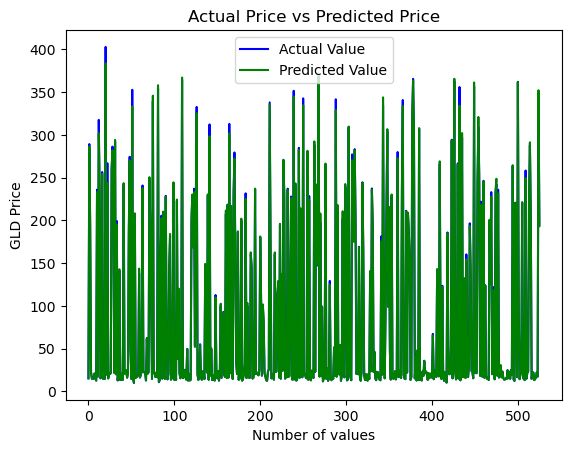

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

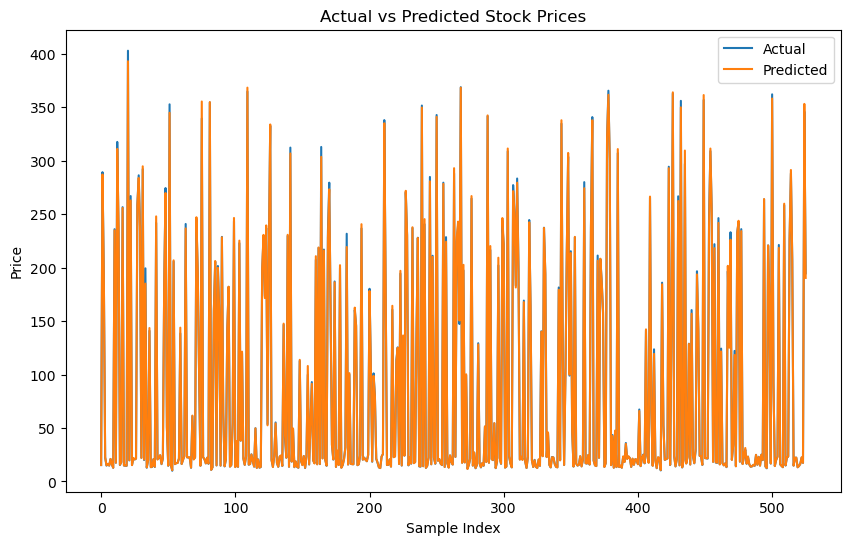

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([ 14.39358544,  14.0493315 ,  13.95963732, ..., 167.71103083,
       169.38379039, 171.32117005])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value234
enter a value32
enter a value23
-117.64659813484867


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("tesla_model.pkl",'wb')
pickle.dump(model,file)